In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


### Load the NY state geo file

In [2]:
#ny_state.to_file('../data/ny_state_counties.json', driver='GeoJSON')

In [3]:
ny_state_gdf = gpd.read_file('../data/geodata/ny_state_counties.json')

## Plot the geo file to show NY State and its counties

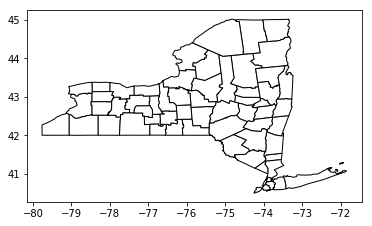

In [4]:
ny_state_gdf.plot(color='white', edgecolor='black')

In [5]:
ny_state_gdf.head(20)

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,0500000US36011,36,011,Cayuga,County,691.582,"POLYGON ((-76.499312 43.097949, -76.491941 43...."
1,0500000US36021,36,021,Columbia,County,634.705,"POLYGON ((-73.929626 42.078778, -73.910675 42...."
2,0500000US36023,36,023,Cortland,County,498.760,"POLYGON ((-76.253359 42.407568, -76.265584 42...."
3,0500000US36033,36,033,Franklin,County,1629.119,"POLYGON ((-73.90968700000001 44.429699, -74.14..."
4,0500000US36041,36,041,Hamilton,County,1717.373,"POLYGON ((-74.712615 43.286143, -74.867712 43...."
5,0500000US36049,36,049,Lewis,County,1274.679,"POLYGON ((-75.11015999999999 43.615229, -75.53..."
6,0500000US36057,36,057,Montgomery,County,403.043,"POLYGON ((-74.488844 42.985118, -74.289304 42...."
7,0500000US36065,36,065,Oneida,County,1212.429,"POLYGON ((-75.247963 42.871604, -75.437167 42...."
8,0500000US36073,36,073,Orleans,County,391.259,"POLYGON ((-77.995665 43.287448, -77.995723 43...."
9,0500000US36079,36,079,Putnam,County,230.312,"POLYGON ((-73.981486 41.438905, -73.933775 41...."


### Merge hate crimes data with the NYS geo file

In [6]:
hate_crimes_df = pd.read_csv('../data/Hate_Crimes_Normalized.csv')

In [7]:
ny_state_hc_gdf=ny_state_gdf.merge(hate_crimes_df, left_on='NAME', right_on='County', how='left')

In [8]:
ny_state_hc_gdf.shape

(62, 12)

## Plot the Hate crimes data as a heat map on the map of NYS 

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Text(0.5, 1.0, 'NYS Hate Crimes by County 2016')

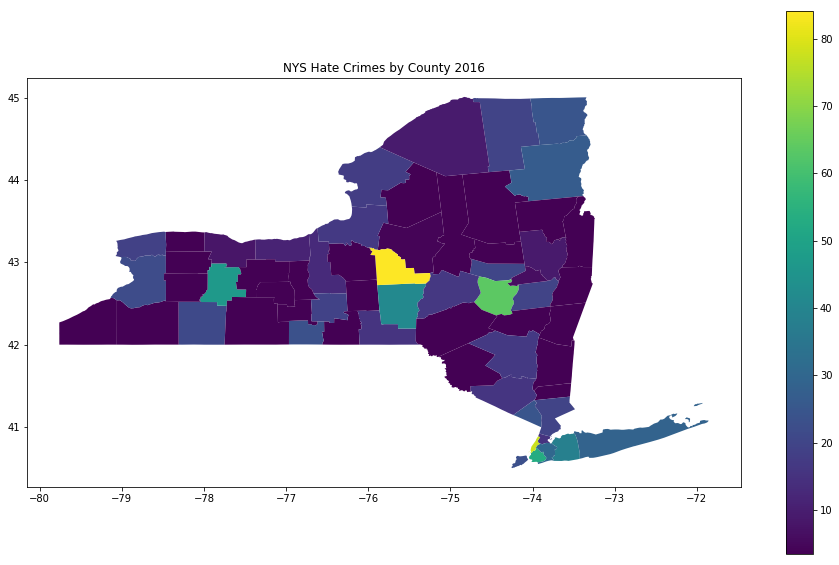

In [9]:
ny_state_hc_gdf.plot(column='HC_per_Mill', figsize=(16,10), legend=True)
plt.title('NYS Hate Crimes by County 2016')

* aside from the urban area near New York City, the counties with the highest rates of hate crimes per million people are located in more rural upstate New York

## Plot the NYS population data as a heat map on the map of NYS 

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Text(0.5, 1.0, 'NYS Population by County 2016')

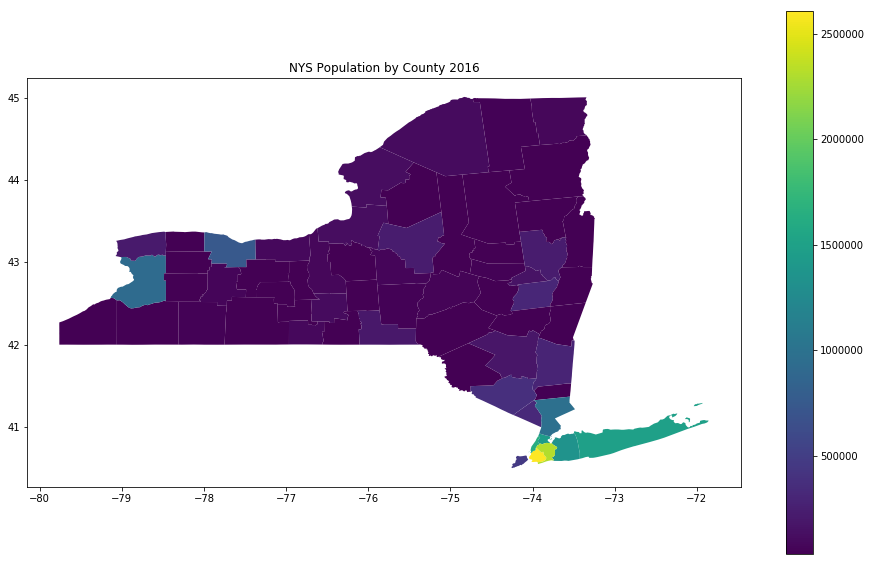

In [10]:
ny_state_hc_gdf.plot(column='Population', figsize=(16,10), legend=True)
plt.title('NYS Population by County 2016')

* the areas with the highest incidents of hate crime are not the most densely populated areas

### Get 2016 presidental data

In [11]:
pres2016_df = pd.read_csv('../data/2016President_clean.csv')

### Create a new column called "Winner" that lists the name of the winner for each county

In [12]:
pres2016_df['Winner']=np.where(pres2016_df['Clinton-Kaine-Total'] > pres2016_df['Trump-Pence-Total'], 'Clinton', 'Trump')

### Look at the updated voting data frame

In [13]:
pres2016_df

,County,Clinton-Kaine-Total,Trump-Pence-Total,Other,Winner
0,Albany,83071,47808,7621,Clinton
1,Allegany,4882,12525,1109,Trump
2,Broome,39212,40943,5053,Trump
3,Cattaraugus,9497,19692,1767,Trump
4,Cayuga,13522,17384,1959,Trump
5,Chautauqua,19091,31594,3064,Trump
6,Chemung,13757,20097,2004,Trump
7,Chenango,6775,11921,1295,Trump
8,Clinton,15059,14449,1995,Clinton
9,Columbia,15284,13756,1624,Clinton


## Create a column in the geo file with the center point for each county

In [14]:
ny_state_gdf['centroid']=ny_state_gdf.geometry.centroid

### Create a new centroids data frame made up of the county names and their center points

In [15]:
ny_centroids_df=ny_state_gdf[['NAME', 'centroid']]

### Merge the centroids data frame with the voting data frame

In [16]:
pres2016_df=pres2016_df.merge(ny_centroids_df, left_on='County', right_on='NAME')

### Look at the new data frame

In [17]:
pres2016_df

,County,Clinton-Kaine-Total,Trump-Pence-Total,Other,Winner,NAME,centroid
0,Albany,83071,47808,7621,Clinton,Albany,POINT (-73.97332112976821 42.6004269999077)
1,Allegany,4882,12525,1109,Trump,Allegany,POINT (-78.02737853678454 42.25734489768612)
2,Broome,39212,40943,5053,Trump,Broome,POINT (-75.81963790314809 42.1602918558666)
3,Cattaraugus,9497,19692,1767,Trump,Cattaraugus,POINT (-78.67909447400112 42.24843698717797)
4,Cayuga,13522,17384,1959,Trump,Cayuga,POINT (-76.55458744864653 42.91750995693954)
5,Chautauqua,19091,31594,3064,Trump,Chautauqua,POINT (-79.36664294342765 42.22815412798193)
6,Chemung,13757,20097,2004,Trump,Chemung,POINT (-76.76022609731982 42.14111532954684)
7,Chenango,6775,11921,1295,Trump,Chenango,POINT (-75.61157562896584 42.49341207929965)
8,Clinton,15059,14449,1995,Clinton,Clinton,POINT (-73.6783529344272 44.7460918820715)
9,Columbia,15284,13756,1624,Clinton,Columbia,POINT (-73.63180052565518 42.25019583934267)


## Create a geo file that maps the centroids of the counties

In [18]:
pres2016_gdf=gpd.GeoDataFrame(pres2016_df, geometry=pres2016_df['centroid'])

## Print the color of each centroid as blue if the winner was Clinton and red if the winner was Trump

Text(0.5, 1.0, 'NYS Votes by County 2016')

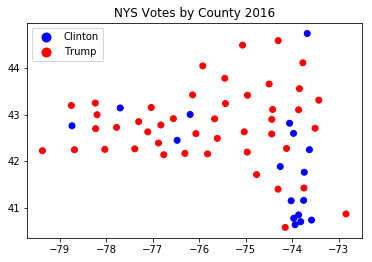

In [19]:
pres2016_gdf.plot(column='Winner', categorical=True, legend=True, cmap='bwr')
plt.title('NYS Votes by County 2016')

* as was clear in the voting graphs in the voting analysis notebook, the majority of the counties in NYS went for Trump, but the heavily populated counties went for Clinton

## Place the "Winner" centroids map over the hate crimes heat map in order to compare the two

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Text(0.5, 1.0, 'NYS Voting and Hate Crimes by County 2016')

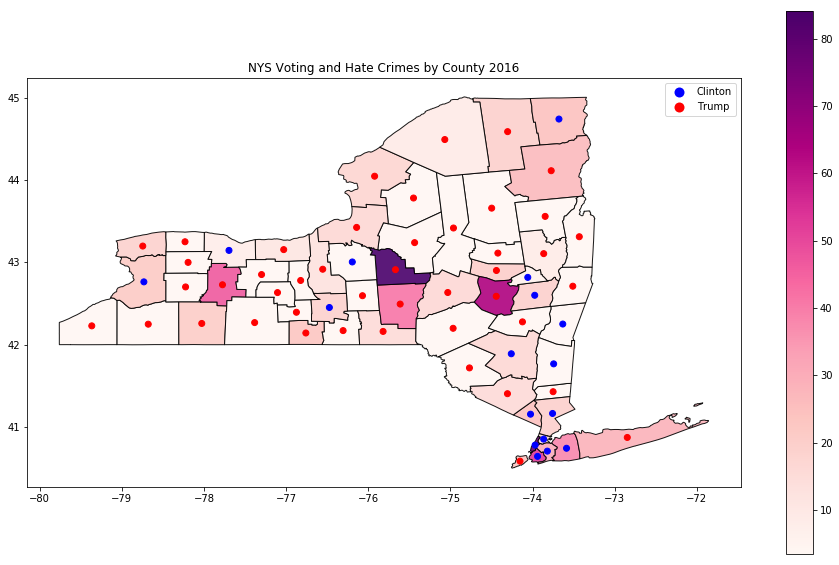

In [20]:
base=ny_state_hc_gdf.plot(column='HC_per_Mill', figsize=(16,10), legend=True, alpha=0.9, cmap = 'RdPu', edgecolor='black')
pres2016_gdf.plot(column='Winner', categorical=True, legend=True, cmap='bwr', ax=base)
plt.title('NYS Voting and Hate Crimes by County 2016')


* the majority of the counties with the highest instances of hate crimes went for Trump
* however, it is a relatively small number of counties and the vast majority of the counties that went for Trump had low instances of hate crimes
* there doesn't seem to be a direct correlation between the two

<div class="alert alert-info">
    <h4>Looking at the average HC_per_mill by winner</h4>
    <li>You could improve your analysis by taking the average of hate crimes grouped by the winner</li>
    <li>See below some steps to do this and numeric and visual representations that support your assertion that there is no significant difference</li>
</div>

In [26]:
pres2016_gdf.head(5)

,County,Clinton-Kaine-Total,Trump-Pence-Total,Other,Winner,NAME,centroid,geometry
0,Albany,83071,47808,7621,Clinton,Albany,POINT (-73.97332112976821 42.6004269999077),POINT (-73.97332112976821 42.6004269999077)
1,Allegany,4882,12525,1109,Trump,Allegany,POINT (-78.02737853678454 42.25734489768612),POINT (-78.02737853678454 42.25734489768612)
2,Broome,39212,40943,5053,Trump,Broome,POINT (-75.81963790314809 42.1602918558666),POINT (-75.81963790314809 42.1602918558666)
3,Cattaraugus,9497,19692,1767,Trump,Cattaraugus,POINT (-78.67909447400112 42.24843698717797),POINT (-78.67909447400112 42.24843698717797)
4,Cayuga,13522,17384,1959,Trump,Cayuga,POINT (-76.55458744864653 42.91750995693954),POINT (-76.55458744864653 42.91750995693954)


In [28]:
winner_by_county = pres2016_gdf[['County','Winner']]

In [31]:
winner_by_county_hc = ny_state_hc_gdf[['NAME','HC_per_Mill']].merge(winner_by_county, left_on='NAME', right_on='County')

In [42]:
winner_by_county_hc.groupby('Winner')['HC_per_Mill'].describe()

,count,mean,std,min,25%,50%,75%,max
Winner,,,,,,,,
Clinton,15.0,25.284636,19.144194,3.412399,15.987353,19.576408,27.576525,77.615979
Trump,22.0,24.867070,18.942101,4.341258,15.545110,19.243887,25.743040,84.162096


In [43]:
winner_by_county_hc.groupby('Winner')['HC_per_Mill'].mean()

Winner
Clinton    25.284636
Trump      24.867070
Name: HC_per_Mill, dtype: float64

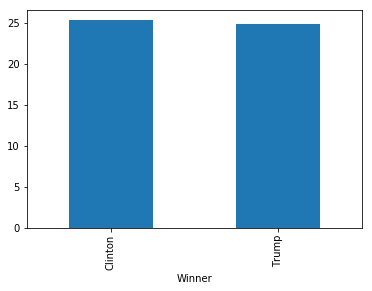

In [44]:
winner_by_county_hc.groupby('Winner')['HC_per_Mill'].mean().plot(kind='bar')

In [36]:
import seaborn as sns

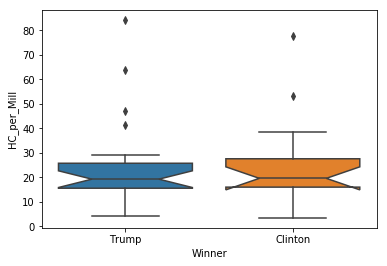

In [41]:
sns.boxplot(data=winner_by_county_hc, x='Winner', y='HC_per_Mill', notch=True)